In [1]:
import plotly.express as px
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
output_txt = "../output.txt"

In [3]:
f = open(output_txt, "r")
content = f.read()
periods = content.split("CURRENT PERIOD")[1:]

In [4]:
regex_assignment = re.compile(
    r"V(.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?\(.*?\))    (.*?\(.*?\))    (.*?\(.*?\))    (.*?\(.*?\))"
)

In [5]:
final_d = {}

i = 0
for p in periods:
    matches = re.findall(regex_assignment, p)
    aux = []
    for match in matches:
        d = {}
        d["P"] = i
        d["Amb"] = match[4]
        d["Task"] = "V" + str(match[0])
        d["G"] = match[1]
        d["A"] = match[2]
        d["λ"] = match[3]
        d["Start"] = float(match[8].split(" ")[0])
        d["Finish"] =float(match[-1].split(" ")[0])
        d["Duration"] = float(match[-1].split(" ")[0]) - float(match[8].split(" ")[0])
        d["TS_S"] = match[8].split(" ")[1].strip("(").strip(")")
        d["TS_F"] = match[-1].split(" ")[1].strip("(").strip(")")
        aux.append(d)
        final_d["V" + str(match[0])] = d
    p_df = pd.DataFrame(aux)


    with pd.option_context('display.max_rows', None,'display.max_columns', None,):
        print(p_df)
        print()
    i += 1

    P    Amb Task  G  A         λ    Start   Finish  Duration      TS_S   
0   0   93.3   V1  3  1   5.10496    0.000  589.147   589.147    7:41:0  \
1   0     65   V2  3  3   5.10496    0.000  562.835   562.835    7:41:0   
2   0  62.14   V3  3  2   5.10496    0.000  577.231   577.231    7:41:0   
3   0  62.14   V4  3  2   5.10496    0.000  582.511   582.511    7:41:0   
4   0  62.14   V5  3  2   5.10496    0.000  572.288   572.288    7:41:0   
5   0   29.9   V6  2  2  0.895303    0.000  525.747   525.747    7:41:0   
6   0     42   V7  2  1  0.895303    0.000  537.847   537.847    7:41:0   
7   0     42   V8  2  1  0.895303    0.000  535.425   535.425    7:41:0   
8   0   29.9   V9  2  2  0.895303  525.747  579.615    53.868   8:45:44   
9   0   29.9  V10  2  2  0.895303  535.425  606.400    70.975   8:55:25   
10  0   29.9  V11  2  2  0.895303  537.847  596.826    58.979   8:57:50   
11  0   29.9  V12  2  2  0.895303  562.835  605.879    43.044   9:22:50   
12  0     42  V13  2  1  

In [6]:
final_aux = []
for k in final_d:
    final_aux.append(final_d[k])
final_aux = sorted(final_aux, key=lambda d: d["Start"])
final_df = pd.DataFrame.from_dict(final_aux)
with pd.option_context('display.max_rows', None,'display.max_columns', None,):
        print(final_df)
        print()

     P    Amb  Task  G  A         λ     Start    Finish  Duration      TS_S   
0    0   93.3    V1  3  1   5.10496     0.000   589.147   589.147    7:41:0  \
1    0     65    V2  3  3   5.10496     0.000   562.835   562.835    7:41:0   
2    0  62.14    V3  3  2   5.10496     0.000   577.231   577.231    7:41:0   
3    0  62.14    V4  3  2   5.10496     0.000   582.511   582.511    7:41:0   
4    0  62.14    V5  3  2   5.10496     0.000   572.288   572.288    7:41:0   
5    0   29.9    V6  2  2  0.895303     0.000   525.747   525.747    7:41:0   
6    0     42    V7  2  1  0.895303     0.000   537.847   537.847    7:41:0   
7    0     42    V8  2  1  0.895303     0.000   535.425   535.425    7:41:0   
8    0   29.9    V9  2  2  0.895303   525.747   579.615    53.868   8:45:44   
9    0   29.9   V10  2  2  0.895303   535.425   606.400    70.975   8:55:25   
10   0   29.9   V11  2  2  0.895303   537.847   596.826    58.979   8:57:50   
11   0   29.9   V12  2  2  0.895303   562.835   605.

In [31]:
import random

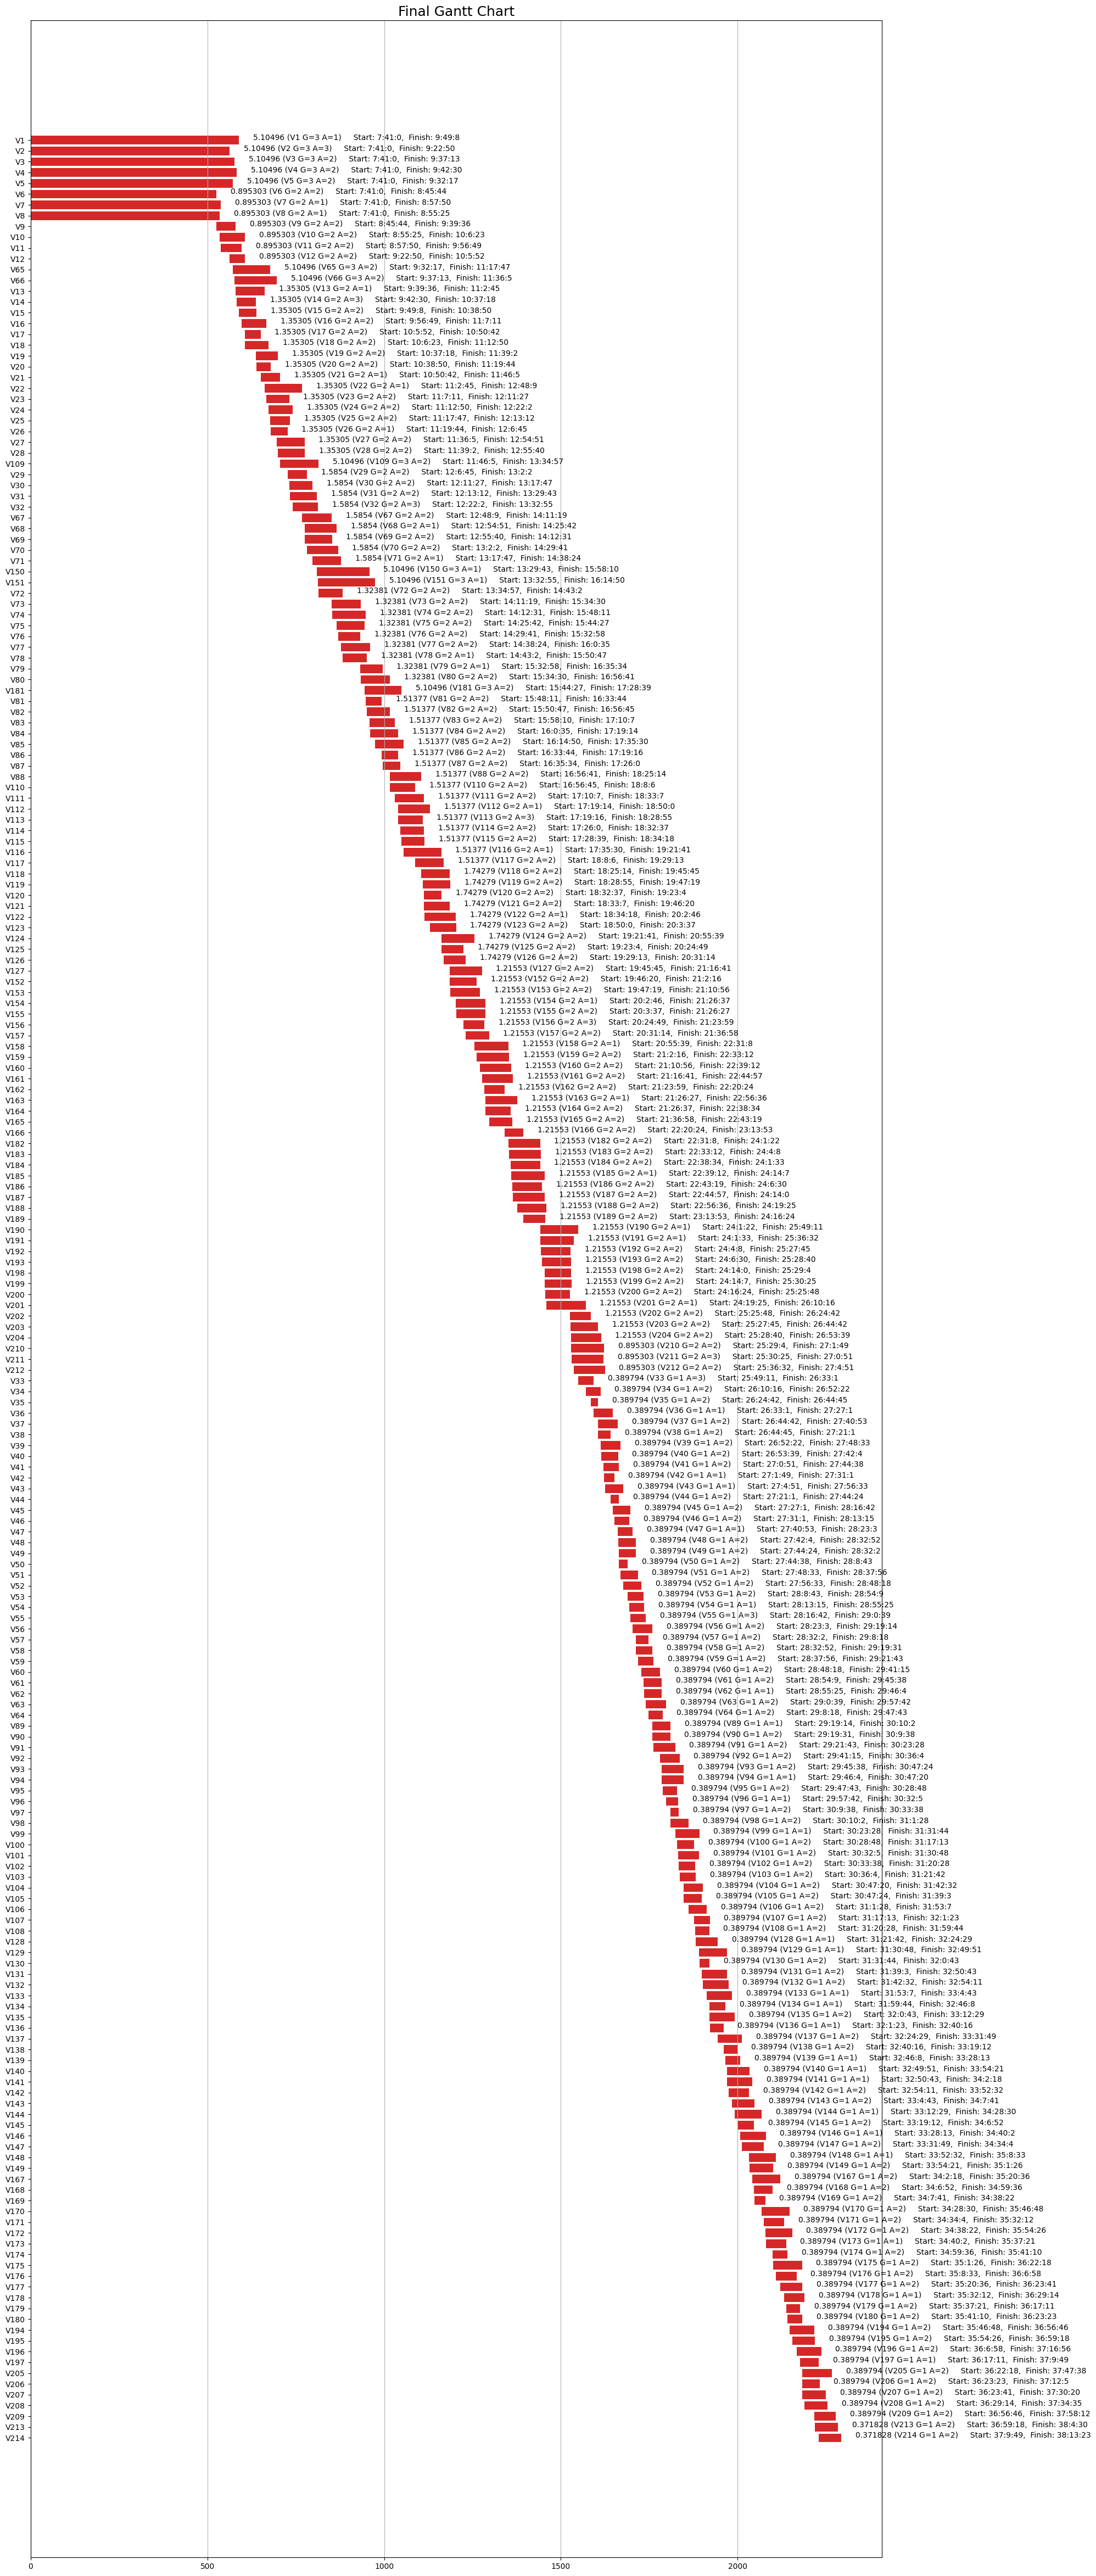

In [34]:
plt.figure(figsize=(20,60))
yticks=[i for i in range(len(final_df.Task))]
for i in range(final_df.shape[0]):
    plt.title('Final Gantt Chart', size=18)
    plt.barh(y=final_df.Task, left=final_df.Start, width=final_df.Duration)
    label =  str(final_df.λ[i]) + " (" + str(final_df.Task[i])+ " G="+ str(final_df.G[i]) + " A=" + str(final_df.A[i]) + ")" +  "     Start: " + str(final_df.TS_S[i])+ ",  Finish: " + str(final_df.TS_F[i])
    plt.text(x=final_df.Start[i]+final_df.Duration[i] + 40, y=yticks[i],s=label)

plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

In [8]:

f.close()